In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# make sure the 'code' dir is on your path (change this):
codepath = '/user_data/mmhender/image_stats_gabor/code/'
sys.path.insert(0,codepath)

from plotting import plot_utils, load_fits, summary_plots
from utils import roi_utils, default_paths

In [19]:
fn = '/user_data/mmhender/image_stats_gabor/model_fits/S08/all_coco/Apr-29-2022_1056_57/residuals_all_trials.npy'

out = np.load(fn, allow_pickle=True).item()
out.keys()

dict_keys(['residuals', 'model_name', 'image_order', 'val_inds', 'session_inds', 'all_dat_r2', 'average_image_reps'])

In [21]:
out['model_name']

'all_coco'

In [14]:
out['average_image_reps']

True

In [15]:
out['fitting_types']

['semantic_coco_things_supcateg',
 'semantic_coco_things_categ',
 'semantic_coco_stuff_supcateg',
 'semantic_coco_stuff_categ']

In [2]:
default_paths.save_fits_path

'/user_data/mmhender/image_stats_gabor/model_fits'

In [3]:
default_paths.nsd_root

''

#### Load fit results

In [4]:
subjects = np.arange(1,9)
n_subjects = len(subjects)

feature_type_list_long = ['gabor_solo_ridge_12ori_8sf',\
                          'all_coco', \
                          'gabor_solo_ridge_12ori_8sf_plus_all_coco', \
                          'gabor_solo_ridge_12ori_8sf_from_residuals']

feature_type_list = ['gabor','coco', 'combined','gabor fit to coco residuals']

n_models = len(feature_type_list)
out_list = []
for fi, fitting_type in enumerate(feature_type_list_long):

    out = [load_fits.load_fit_results(subject=ss, fitting_type=fitting_type, \
                                      n_from_end=0, verbose=False) \
           for ss in subjects]
    out_list.append(out)
    
out = out_list
    
fig_save_folder=None

# create ROI definitions
roi_def = roi_utils.multi_subject_roi_def(subjects, remove_ret_overlap=True, \
                                          remove_categ_overlap=True)
roi_names =roi_def.roi_names
n_rois = roi_def.n_rois

In [6]:
default_paths.nsd_rois_root

'/user_data/mmhender/nsd/rois'

#### Plot unique and shared variance

In [7]:
name1 = 'gabor'

name2 = 'coco-all'

ve_names = ['shared', 'unique: ' + name1, 'unique: ' + name2]

gray_color = np.array([[0.6, 0.6, 0.6, 1]])

vis_color1 = cm.Purples(np.linspace(0,1,4))[2:3,:]
vis_color2 = cm.Blues(np.linspace(0,1,4))[2:3,:]

colors = np.concatenate([gray_color, vis_color1, vis_color2], axis=0)

In [8]:
from utils import stats_utils

vals = np.zeros((n_subjects, n_rois, 3))

for si, ss in enumerate(subjects):
    
    r2_full = out[2][si]['val_r2'][:,0]
    r2_gab = out[0][si]['val_r2'][:,0]
    r2_coco = out[1][si]['val_r2'][:,0]
    
    var_expl = np.array(stats_utils.get_shared_unique_var(r2_full, r2_gab, r2_coco, \
                                                          convert_to_prop=False)).T
    gabor_abvthresh = r2_gab>0.01
    nc_abvthresh = summary_plots.get_noise_ceiling(out[0][si])>0.01
    inds2use = nc_abvthresh & gabor_abvthresh
   
    for ri in range(n_rois):
        
        inds_this_roi = roi_def.ss_roi_defs[si].get_indices(ri) & inds2use 
        vals[si,ri,:] = np.mean(var_expl[inds_this_roi,:], axis=0)
        

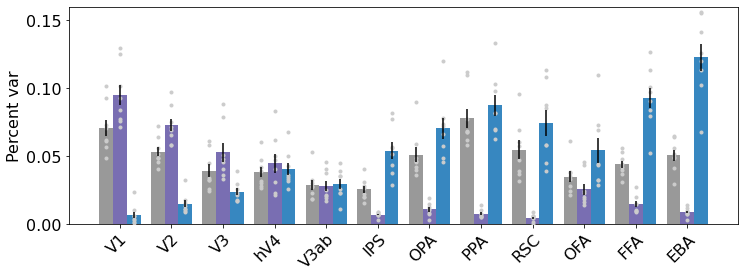

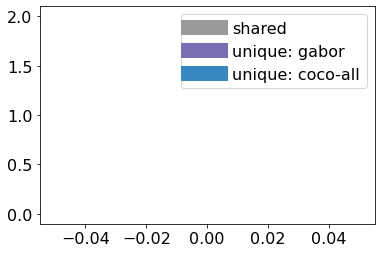

In [9]:
      
mean_vals = np.mean(vals, axis=0)
sem_vals = np.std(vals, axis=0) / np.sqrt(n_subjects)

plt.rcParams['pdf.fonttype']=42
plot_utils.set_all_font_sizes(fs = 16)

fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, \
                                point_data = vals, \
                           colors=colors, space=0.1, \
                xticklabels=roi_names, ylabel='Percent var', \
                ylim=[0, 0.16], title='', horizontal_line_pos=None,\
                legend_labels=np.array(ve_names), \
                legend_overlaid=False, legend_separate=True, \
                fig_size=(12,4))



In [41]:
si=0;

r2_full = out[2][si]['val_r2'][:,0]
r2_gab = out[0][si]['val_r2'][:,0]
r2_coco = out[1][si]['val_r2'][:,0]
r2_resid = out[3][si]['val_r2'][:,0]

unique_gab = r2_full - r2_coco
unique_coco = r2_full - r2_gab

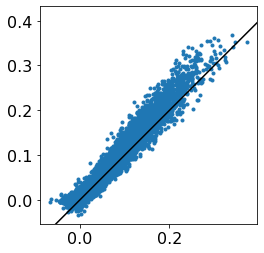

In [43]:
plt.figure()
plt.plot(r2_resid, unique_gab,'.')
plt.axis('square')
lims = [-0.1, 0.4]
plt.plot(lims, lims, color='k')